# AutoKeras로 텍스트 분류 예측하기

2021.07.21. Kyunghoon Kim   
http://github.com/coredottoday/DeepLearningTextBook/

# 라이브러리 설치

먼저 오토케라스를 설치해 주겠습니다.

In [1]:
%tensorflow_version 2.x

In [2]:
pip install autokeras

라이브러리를 아래와 같이 불러오겠습니다.

In [112]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import os

import numpy as np
import tensorflow as tf
import pandas as pd
import autokeras as ak

## 스팸볶음밥의 스팸 데이터

스팸볶음밥 팀의 스팸 데이터를 pandas로 불러옵니다.

In [5]:
df = pd.read_csv("spam2.csv", index_col=0)

In [6]:
df

,문자내용,스팸/햄,스팸의 종류,
0,[Web발신] (광고)핸드폰개통점입니다. ▷Galaxy S21 선착순43명 무료 성...,스팸,2.0,NaN
1,[Web발신] 안녕하세요 핸드폰개통점입니다 갤럭시S21//삼성A426 *기계값 90...,스팸,2.0,NaN
2,[Web발신] (광고) ▶인터넷 혜:택 제공팀 안녕하십니까~ 혜:택부서팀장 허윤...,스팸,2.0,NaN
3,[Web발신] (광고) LG.SK.KT 인-터넷 통신사 이.동&신.규 52만원(45...,스팸,2.0,NaN
4,[Web발신] (광고)♥kt노트10 ♥15만원 한정수량 이름: 전화번호: 신청 문자...,스팸,2.0,NaN
...,...,...,...,...
1560,막 하룻밤 즐겼는데 상대가 코로나 확진자라면???,햄,0.0,0.0
1561,클럽 세군데 넘게 갔다는데 하룻밤인지 며칠인지 알수는 없고,햄,0.0,0.0
1562,하룻밤 보내면 남친이미줘,햄,0.0,0.0
1563,평균치는 하룻밤정도 타이레놀 먹고 끙끙거리고 담날 피곤해하는정도?,햄,0.0,0.0


In [10]:
df['스팸의 종류'].unique()

array([ 2.,  8.,  4.,  7.,  5.,  6.,  3.,  9., nan,  0.])

In [11]:
df['스팸/햄'].unique()

array(['스팸', '햄'], dtype=object)

스팸인 데이터만 불러보겠습니다.

In [12]:
df[df['스팸/햄']=='스팸']

,문자내용,스팸/햄,스팸의 종류,
0,[Web발신] (광고)핸드폰개통점입니다. ▷Galaxy S21 선착순43명 무료 성...,스팸,2.0,NaN
1,[Web발신] 안녕하세요 핸드폰개통점입니다 갤럭시S21//삼성A426 *기계값 90...,스팸,2.0,NaN
2,[Web발신] (광고) ▶인터넷 혜:택 제공팀 안녕하십니까~ 혜:택부서팀장 허윤...,스팸,2.0,NaN
3,[Web발신] (광고) LG.SK.KT 인-터넷 통신사 이.동&신.규 52만원(45...,스팸,2.0,NaN
4,[Web발신] (광고)♥kt노트10 ♥15만원 한정수량 이름: 전화번호: 신청 문자...,스팸,2.0,NaN
...,...,...,...,...
799,[코멘토] 서포터즈하고 에어팟프로 받고 [Web발신] 울산대학교의 제휴혜택을 널...,스팸,9.0,NaN
800,[Web발신] 울산대 학생이세요? 이벤트 참여하고 베라도 받아보세요:) ▶ ht...,스팸,9.0,NaN
801,"누구나 주문할 때마다 5,OOO원 할인! [Web발신] (광고) 누구나 주문할 ...",스팸,9.0,NaN
802,[LG U+] [Web발신] (광고)[LG U+]아이폰 수리비 할인 안내 고객...,스팸,9.0,NaN


햄도 한 번 볼까요?

In [13]:
df[df['스팸/햄']=='햄']

,문자내용,스팸/햄,스팸의 종류,
804,(광고)이니스프리 씨드 멤버십 제도 변경 안내(7/1~) ☞ goo.gl/KXzwp...,햄,NaN,NaN
805,(주)HR컨설팅그룹 헤드헌터 정성원 상무입니다. 서울시 금천구에 소재한 바이오 선...,햄,NaN,NaN
806,* 안녕하세요~ 주문하신 음식 도착했습니다.,햄,NaN,NaN
807,[CJ택배 배송완료] 고객님의 상품(6378068347,햄,NaN,NaN
808,[Web 발신] [CJ대한통운 택배_배송완료] 박주* 고객님 반갑습니다. 행복을 ...,햄,NaN,NaN
...,...,...,...,...
1560,막 하룻밤 즐겼는데 상대가 코로나 확진자라면???,햄,0.0,0.0
1561,클럽 세군데 넘게 갔다는데 하룻밤인지 며칠인지 알수는 없고,햄,0.0,0.0
1562,하룻밤 보내면 남친이미줘,햄,0.0,0.0
1563,평균치는 하룻밤정도 타이레놀 먹고 끙끙거리고 담날 피곤해하는정도?,햄,0.0,0.0


### 데이터셋 구성

정상 문자는 `y` 값을 `0`으로 주고,   
스팸 문자는 `y` 값을 `1`로 주겠습니다.

In [7]:
df.loc[df['스팸/햄']=='햄', 'y'] = 0
df.loc[df['스팸/햄']=='스팸', 'y'] = 1

In [15]:
df

,문자내용,스팸/햄,스팸의 종류,,y
0,[Web발신] (광고)핸드폰개통점입니다. ▷Galaxy S21 선착순43명 무료 성...,스팸,2.0,NaN,1.0
1,[Web발신] 안녕하세요 핸드폰개통점입니다 갤럭시S21//삼성A426 *기계값 90...,스팸,2.0,NaN,1.0
2,[Web발신] (광고) ▶인터넷 혜:택 제공팀 안녕하십니까~ 혜:택부서팀장 허윤...,스팸,2.0,NaN,1.0
3,[Web발신] (광고) LG.SK.KT 인-터넷 통신사 이.동&신.규 52만원(45...,스팸,2.0,NaN,1.0
4,[Web발신] (광고)♥kt노트10 ♥15만원 한정수량 이름: 전화번호: 신청 문자...,스팸,2.0,NaN,1.0
...,...,...,...,...,...
1560,막 하룻밤 즐겼는데 상대가 코로나 확진자라면???,햄,0.0,0.0,0.0
1561,클럽 세군데 넘게 갔다는데 하룻밤인지 며칠인지 알수는 없고,햄,0.0,0.0,0.0
1562,하룻밤 보내면 남친이미줘,햄,0.0,0.0,0.0
1563,평균치는 하룻밤정도 타이레놀 먹고 끙끙거리고 담날 피곤해하는정도?,햄,0.0,0.0,0.0


이제 학습시킬 데이터를 `data_x`와 `data_y`로 만듭니다.

In [8]:
data_x = df['문자내용'].values
data_y = df['y'].values

이를 라이브러리 scikit-learn의 `train_test_split` 함수를 이용해 분리하겠습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

학습할 데이터는 1095개, 테스트할 데이터는 470개로 구분되었네요.

In [11]:
print("Train data:", X_train.shape, " Test data:", X_test.shape)

Train data: (1095,)  Test data: (470,)


스팸과 햄이 얼마나 들어 잇는지도 볼까요?

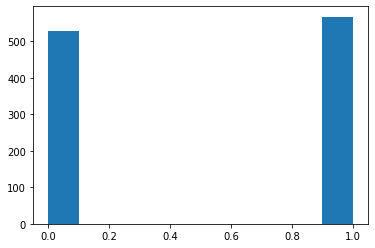

In [113]:
plt.hist(y_train);

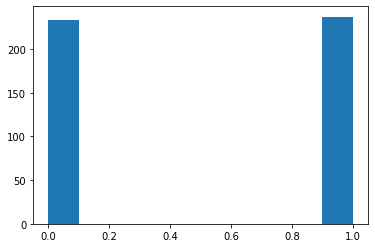

In [114]:
plt.hist(y_test);

비슷한 비율로 들어 있네요!

## Autokeras 학습

In [20]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=1
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(X_train, y_train, epochs=2)
# Predict with the best model.
predicted_y = clf.predict(X_test)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Trial 1 Complete [00h 00m 18s]
val_loss: 0.6748178601264954

Best val_loss So Far: 0.6748178601264954
Total elapsed time: 00h 00m 18s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
35/35 [==============================] - 1s 12ms/step - loss: 0.6909 - accuracy: 0.5297
Epoch 2/2
35/35 [==============================] - 0s 12ms/step - loss: 0.6739 - accuracy: 0.5982
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets
15/15 [==============================] - 0s 6ms/step - loss: 0.6428 - accuracy: 0.7340
[0.6428483128547668, 0.7340425252914429]


아주 간단한 명령어로 혼자 학습 하고 끝났네요.   
테스트 데이터에 대한 평가는 아래와 같이 할 수 있습니다.

In [21]:
clf.evaluate(X_test, y_test, verbose=1)

15/15 [==============================] - 0s 6ms/step - loss: 0.6428 - accuracy: 0.7340


[0.6428483128547668, 0.7340425252914429]

이 실험을 여러 번 반복해 볼까요?   
일단 20번 반복하겠습니다.

In [19]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=20
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(X_train, y_train, epochs=30, batch_size=8)
# Predict with the best model.
predicted_y = clf.predict(X_test)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Trial 20 Complete [00h 00m 18s]
val_loss: 0.41618016362190247

Best val_loss So Far: 0.39898377656936646
Total elapsed time: 00h 23m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
137/137 [==============================] - 2s 9ms/step - loss: 0.6914 - accuracy: 0.5224
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 0.4571 - accuracy: 0.8082
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.1498 - accuracy: 0.9443
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.0674 - accuracy: 0.9763
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0490 - accuracy: 0.9808
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0378 - accuracy: 0.9826
Epoch 7/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0388 - accuracy: 0.9808
Epoch 8/30
137/137 [==============================] - 1s 9ms/step - loss: 0.0354 - accuracy: 0.9826
Epoch 9/30
137/137 [=====

`83.1%` 성능이 나왔네요!

In [20]:
print(clf.evaluate(X_test, y_test))

15/15 [==============================] - 0s 6ms/step - loss: 0.7042 - accuracy: 0.8319
[0.7042093276977539, 0.8319149017333984]


최종 선택된 best model의 내부 구조가 어떻게 생겼는지 한 번 보겠습니다.

In [24]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 1)                 0         
_________________________________________________________________
text_vectorization (TextVect (None, 512)               0         
_________________________________________________________________
embedding (Embedding)        (None, 512, 64)           320064    
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 506, 256)          114944    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0     

이 모델은 저장해 두었다가 나중에 다시 쓸 수 있어요.   
다음과 같이 저장하고 저 저장된 폴더를 다운 받아서 보관하시면 됩니다.

In [22]:
model = clf.export_model()

In [23]:
try:
    model.save("model_autokeras", save_format="tf")
except Exception:
    model.save("model_autokeras.h5")

INFO:tensorflow:Assets written to: model_autokeras/assets


혹시 더 많은 실험(trial)을 하면 더 좋은 성능이 나올 수 있으니 더 돌려보겠습니다.   
아래는 200번 실험을 목표로, 1시간 31분 걸려서 나온 결과입니다.

In [28]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=200
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(X_train, y_train, epochs=30, batch_size=8)
# Predict with the best model.
predicted_y = clf.predict(X_test)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Trial 130 Complete [00h 00m 46s]
val_loss: 0.3933804929256439

Best val_loss So Far: 0.36371904611587524
Total elapsed time: 01h 31m 38s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
137/137 [==============================] - 3s 14ms/step - loss: 0.6941 - accuracy: 0.4941
Epoch 2/30
137/137 [==============================] - 2s 14ms/step - loss: 0.6846 - accuracy: 0.5772
Epoch 3/30
137/137 [==============================] - 2s 14ms/step - loss: 0.6739 - accuracy: 0.6374
Epoch 4/30
137/137 [==============================] - 2s 14ms/step - loss: 0.6376 - accuracy: 0.7306
Epoch 5/30
137/137 [==============================] - 2s 14ms/step - loss: 0.5646 - accuracy: 0.8365
Epoch 6/30
137/137 [==============================] - 2s 14ms/step - loss: 0.4511 - accuracy: 0.8977
Epoch 7/30
137/137 [==============================] - 2s 14ms/step - loss: 0.3198 - accuracy: 0.9333
Epoch 8/30
137/137 [==============================] - 2s 14ms/step - loss: 0.2220 - accuracy: 0.9507
Epoch 9/30
137/13

최종 성능은 `83.4%`로 아까보다 `0.3%` 더 잘 나오네요!

In [30]:
model2 = clf.export_model()

In [31]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 1)                 0         
_________________________________________________________________
text_vectorization (TextVect (None, 128)               0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 256)          1280256   
_________________________________________________________________
conv1d (Conv1D)              (None, 122, 256)          459008    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792 

In [116]:
try:
    model2.save("./model2_autokeras", save_format="tf")
except Exception:
    model2.save("./model2_autokeras.h5")

INFO:tensorflow:Assets written to: ./model2_autokeras/assets


# 분류 예측 관찰

이제 모델에 실제 문자 데이터를 넣어서 성능을 눈으로 직접 확인해 볼께요.

In [118]:
text = "안녕하세요"
model.predict(np.array([text]))

array([[0.8174284]], dtype=float32)

In [119]:
text = "안녕하세요"
model2.predict(np.array([text]))

array([[0.45579416]], dtype=float32)

모델 1은 문자 `안녕하세요`에 대해 81%의 확률로 스팸이라고 보지만, 모델 2는 45%라는 군요.   
스팸들의 경향을 봤을 때 `안녕하세요`는 참 애매한 문자인 것 같아요 ^^;

학습시킨 데이터들에 대해서는 어떻게 예측하는지 한 번 볼까요?

In [40]:
X_train[0]

'여러분 저 등기이전 완료했어요. 내년에 집 값 오르길 기우ㅏㄴ합니다 흑흑 ㅠㅜ 아빠랑 얼른 전세계약해ㅛㅏ 탈출하면 반 성공... 아빠랑 전세계약하고 오피스텔 바로 알아보려고요 십년살고 명의 받기 성공!'

e-07은 10에 -7승, 거의 0에 가까운 값입니다. 스팸일 확률이 없네요.   
삐빅, 정상 문자

In [108]:
model.predict(np.array([X_train[0]]))

array([[3.388009e-07]], dtype=float32)

In [47]:
X_train[10]

'◐국네약국대매비아◐이쁜이 미씨미팅모임    여성흥분제/레비트라 등 / 약국대행업체 / 약국대행업체  오후&#-5;시까지 주문시 당일 물품 발송  직수입정품만 취급합니다. 효과는 기대이상입니다     섹스파트너 / 성인동영상 / 화상채팅 등  오래된사이트로 유명하기도 하고 이쁜 언니들도 많답니다.  둘러본다고해서 손해보는거 없어요  무료회원가입이니 한번 둘러보시고 이용하세요'

In [106]:
text = X_train[10]
print(model.predict(np.array([text])))
print(y_train[10])

[[1.]]
1.0


데이터의 번호를 idx 라는 변수로 두고 계속 여러 테스트를 해볼께요.

In [105]:
idx = 150

print(X_train[idx])
text = X_train[idx]
print(model.predict(np.array([text])))
print(y_train[idx])

[Web발신] (광고) 일 171% 단타 체결 무료단톡 진행중 전문상담원 대기 lrl.kr/6jD  무료거부 0801364481
[[1.]]
1.0


In [121]:
idx = 1001

print(X_train[idx])
print("모델 1번이 예측한 값:", 
    model.predict(
        np.array([text])
    )
)
print("모델 2번이 예측한 값:", 
    model2.predict(
        np.array([text])
    )
)
print("정답:", int(y_train[idx]))

[Web발신] 따뜻한 성원 잊지 않겠습니다. 남동 발전을 위해 언제나 함께 하겠습니다. -김지호 올림-
모델 1번이 예측한 값: [[0.8174284]]
모델 2번이 예측한 값: [[0.45579416]]
정답: 1


생각보다 결과가 좋은데요, 그럼 스팸인데 진짜 스팸이라고 한 비율은 어떻게 될까요?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

train에 대해서는 거의 100% 가깝게 성능이 나오네요

In [83]:
y_pred = model.predict(X_train)
y_pred = [round(y[0],0) for y in y_pred]
print("accuracy  = ", accuracy_score(y_train, y_pred))
print("recall    = ", recall_score(y_train, y_pred))
print("precision = ", precision_score(y_train, y_pred))
print("f1 score  = ", f1_score(y_train, y_pred))

accuracy  =  0.9872146118721461
recall    =  0.982363315696649
precision =  0.9928698752228164
f1 score  =  0.9875886524822696


test에 대해서도 꽤나 성능이 좋게 나옵니다.

In [58]:
y_pred = model.predict(X_test)
y_pred = [round(y[0],0) for y in y_pred]
print("accuracy  = ", accuracy_score(y_test, y_pred))
print("recall    = ", recall_score(y_test, y_pred))
print("precision = ", precision_score(y_test, y_pred))
print("f1 score  = ", f1_score(y_test, y_pred))

accuracy  =  0.8319148936170213
recall    =  0.8270042194092827
precision =  0.8376068376068376
f1 score  =  0.8322717622080679


그럼 스팸을 직접 한 번 넣어서 점수를 볼까요?

In [88]:
df[df['y']==1.0]

,문자내용,스팸/햄,스팸의 종류,,y
0,[Web발신] (광고)핸드폰개통점입니다. ▷Galaxy S21 선착순43명 무료 성...,스팸,2.0,NaN,1.0
1,[Web발신] 안녕하세요 핸드폰개통점입니다 갤럭시S21//삼성A426 *기계값 90...,스팸,2.0,NaN,1.0
2,[Web발신] (광고) ▶인터넷 혜:택 제공팀 안녕하십니까~ 혜:택부서팀장 허윤...,스팸,2.0,NaN,1.0
3,[Web발신] (광고) LG.SK.KT 인-터넷 통신사 이.동&신.규 52만원(45...,스팸,2.0,NaN,1.0
4,[Web발신] (광고)♥kt노트10 ♥15만원 한정수량 이름: 전화번호: 신청 문자...,스팸,2.0,NaN,1.0
...,...,...,...,...,...
799,[코멘토] 서포터즈하고 에어팟프로 받고 [Web발신] 울산대학교의 제휴혜택을 널...,스팸,9.0,NaN,1.0
800,[Web발신] 울산대 학생이세요? 이벤트 참여하고 베라도 받아보세요:) ▶ ht...,스팸,9.0,NaN,1.0
801,"누구나 주문할 때마다 5,OOO원 할인! [Web발신] (광고) 누구나 주문할 ...",스팸,9.0,NaN,1.0
802,[LG U+] [Web발신] (광고)[LG U+]아이폰 수리비 할인 안내 고객...,스팸,9.0,NaN,1.0


스팸인데, 스팸일 확률이 0.7이 넘지 않는 것들을 출력해 볼께요.

어떤 데이터들이 스팸으로 인식이 안되는지 그 특징들을 눈으로 탐색할 수 있습니다.

In [110]:
for i, row in df[df['y']==1.0].iterrows():
    text = row['문자내용']
    score = model.predict(np.array([text]))[0][0]
    if score < 0.7:
        print(score, text)

0.6985318 [Web발신] 폰개통하셨던 개통점입니다 폰요금6만원이상쓰면 5G갤10 30명만무상 이름만문자로남겨주십쇼
0.38287196 [Web발신] (광고)우수고객 감사행사~ 자택에 사용중인 #인*터*넷 또는 방*송 한 회사만 너무 오랫동안 사용하시면 혜택은 처음보다 줄고 장애는 많아집니다. 3년에 한번오는 소중한 인센티브 이대로 놓치십니까? ★인터냇 바꾸면 ♥최대 ￦7OO,OOO 지*원♥ ★제휴카드+휴대폰결합으로 매달26,000원 할인받아 기존보다 저렴하게 사용하시고 ★넥플릭스, 키즈랜드와같은 다양한 컨텐츠로 집에서도 안심심하게~ ★최신형 장비로 교체까지~ ==저희 센터로 문의주셔야하는 이유== ☆정직하게 상담합니다. ☆거품이 없습니다. ☆고객님께 유리한 상품을 꼼꼼히 봐드립니다. ☆연락만주시면 신청, 설치, 입금, 사후관리까지 알아서~ 아직까지 혜택이 나오는줄 모르시고 그냥 사용하시는분들이 많습니다. 오랫동안 운영하며 행사중이니 연락주셔서 소멸되는 혜택 꼭 확인하시기바랍니다~ ▶전국 시.군.구 서비스센터운영 모든 지역 상담가능 직통번호 : 02.3490.5797 무료수신거부 0801336182
0.61428833 [Web발신] (러시아)천국) 20대모델들과연애 실샤♥ http://bit.ly/chc3327
0.584226  땔  馬^  思^  ㅂ↗ㅣㅇㅇ↗┝  +19+ kohzg697@yahoo.com ­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­
0.39242107 한통가로두통가져시고,두정은기본으로챙겨드려요@­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­
0.14079519 한알이면 나도 변광쇠!      
0.39242107 즐찾필수요,무조건두통,③팩,깔금하게광분제③개로마음껏!@­­­­­­­­­­­­­­­­­­­

전처리 등 입력하는 데이터에 대해 신경을 쓰면 더욱 성능을 높일 수 있을 것 같습니다 :)